# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names = [f'Attribute{i}' for i in range(1, 35)] + ['Class']
data = pd.read_csv('ionosphere.data', header=None, names=column_names)

In [3]:
numeric_data = data.drop('Class', axis=1)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

In [5]:
pca = PCA(n_components = 2)  
X_pca = pca.fit_transform(X_scaled)

In [6]:
min_samples_range = range(1, 11)
epsilon_range = np.arange(0.05, 0.51, 0.01)

In [7]:
silhouette_scores = np.zeros((len(min_samples_range), len(epsilon_range)))

In [8]:
for i, min_sample in enumerate(min_samples_range):
    for j, epsilon in enumerate(epsilon_range):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(X_pca)
        
        # Calculate silhouette score if more than one cluster is formed
        if len(set(labels)) > 1:  # Include noise points (-1)
            score = silhouette_score(X_pca, labels)
        else:
            score = -1 
        
        silhouette_scores[i, j] = score



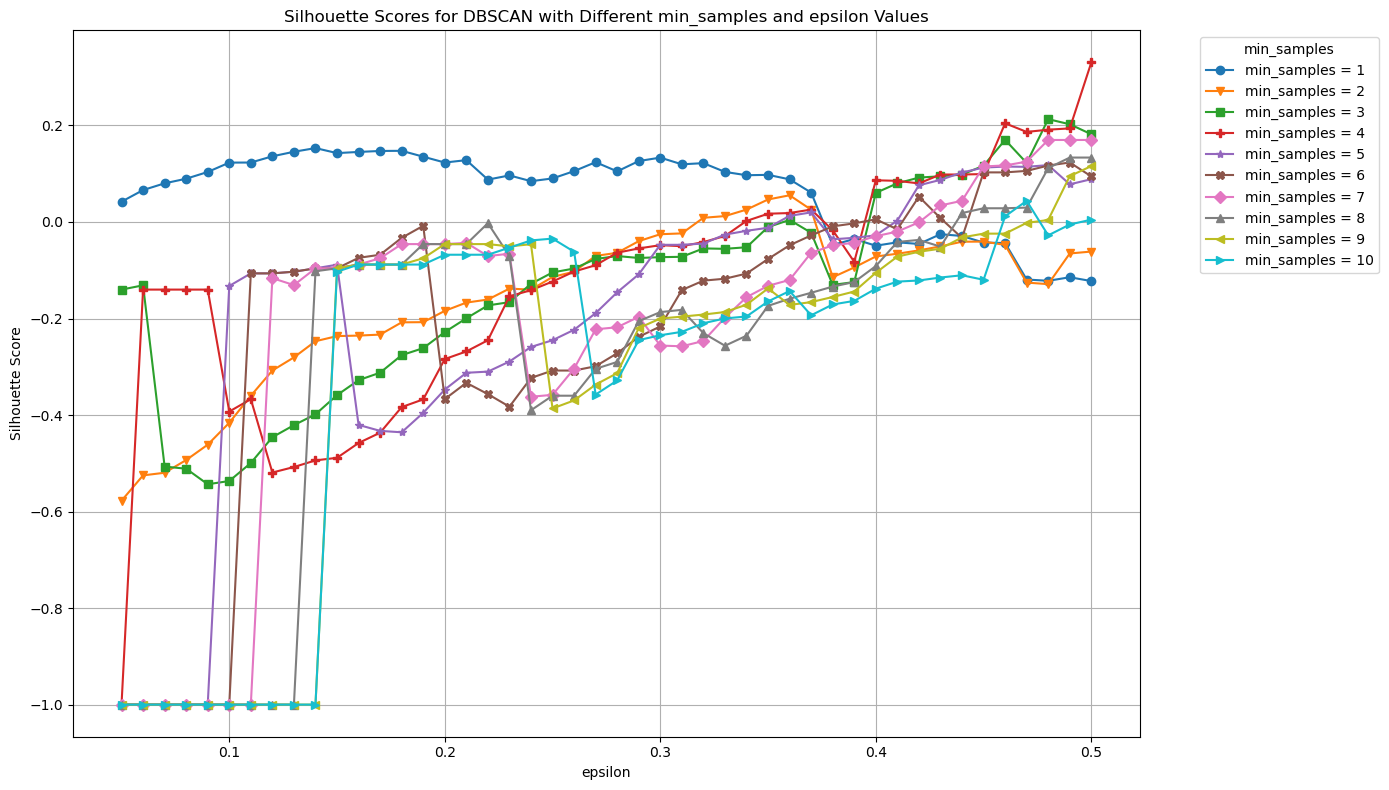

In [9]:
plt.figure(figsize=(14, 8))
markers = ['o', 'v', 's', 'P', '*', 'X', 'D', '^', '<', '>']
for i, min_sample in enumerate(min_samples_range):
    plt.plot(epsilon_range, silhouette_scores[i], marker=markers[i % len(markers)], label=f'min_samples = {min_sample}')

plt.title('Silhouette Scores for DBSCAN with Different min_samples and epsilon Values')
plt.xlabel('epsilon')
plt.ylabel('Silhouette Score')
plt.legend(title='min_samples', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
column_names = [f'Attribute{i}' for i in range(1, 35)] + ['Class']
data = pd.read_csv('ionosphere.data', header=None, names=column_names)

In [12]:
print(data.describe())

       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
count  351.000000       351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738         0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155         0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000         0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000         0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000         0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000         0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000         0.0    1.000000    1.000000    1.000000    1.000000   

       Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute25  \
count  351.000000  351.000000  351.000000   351.000000  ...   351.000000   
mean     0.550095    0.119360    0.511848     0.181345  ...     0.396135   
std      0.492654    0.520750    0.507066 

In [13]:
print(data.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Class          0
dtype: int64


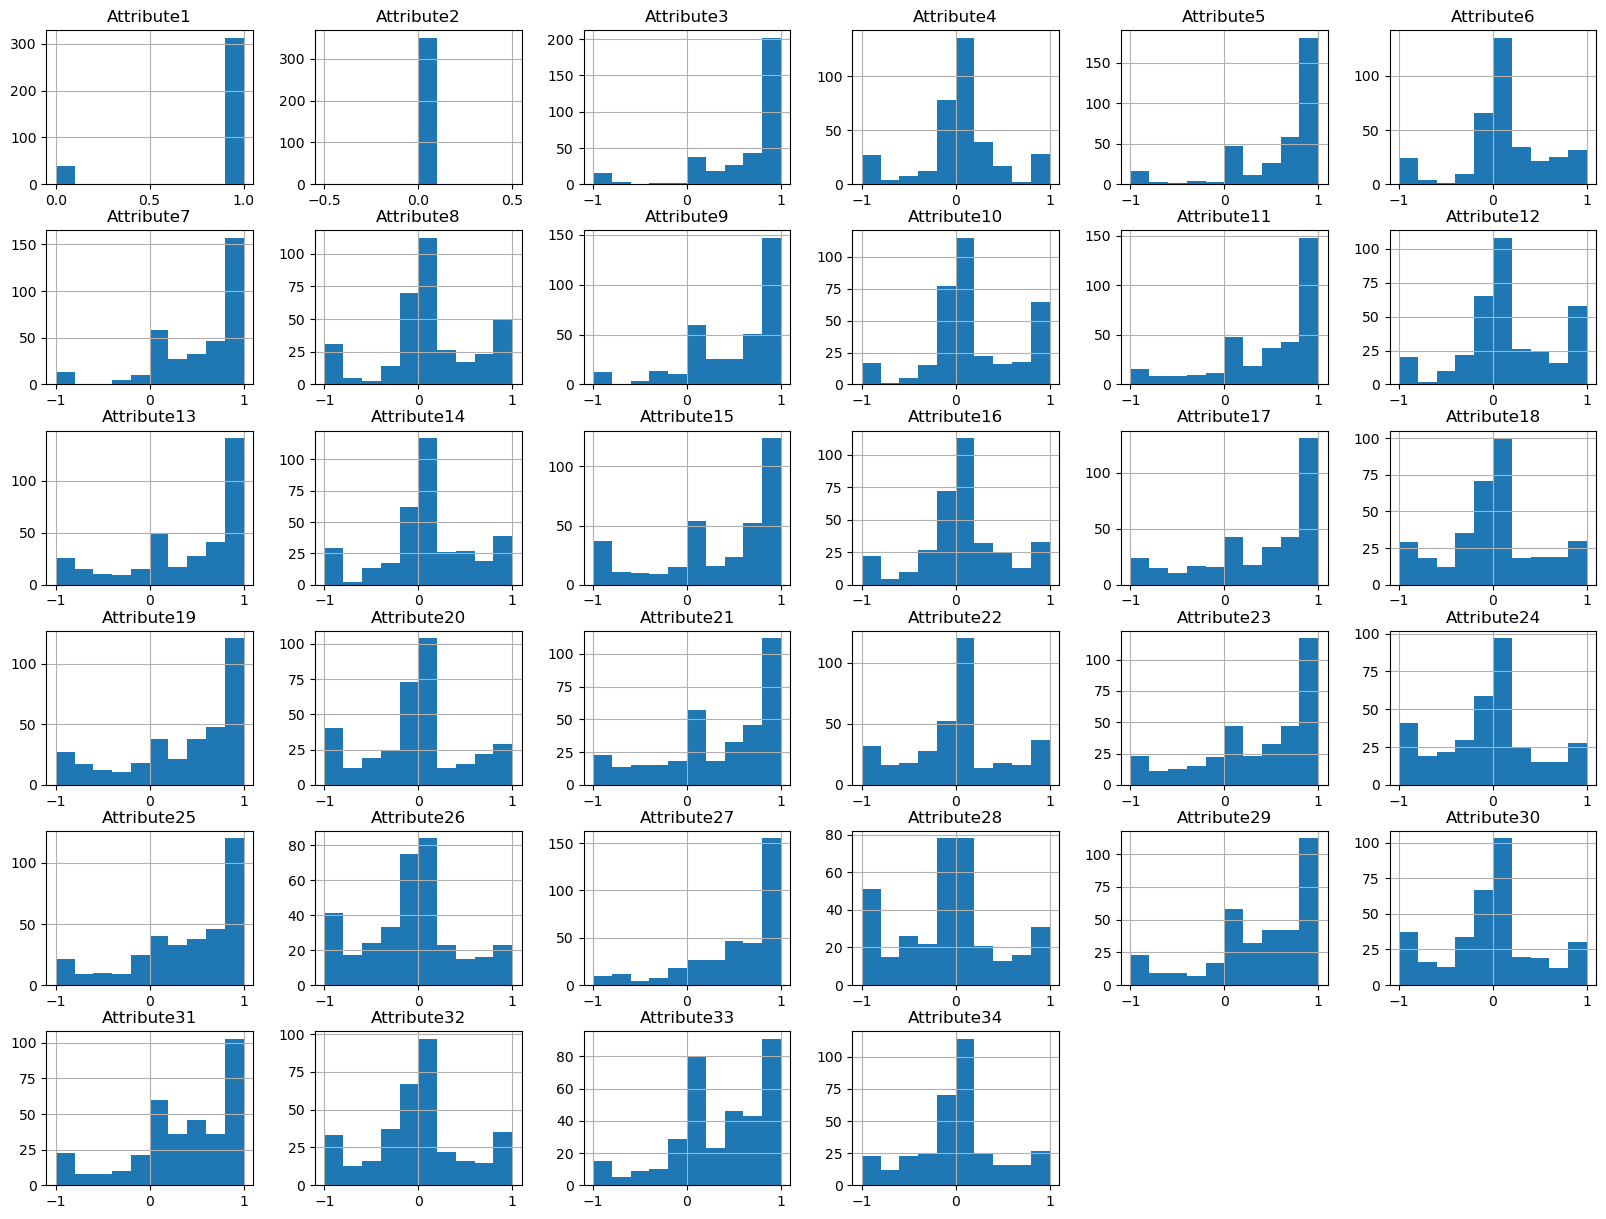

In [14]:
# Histograms for each attribute
data.hist(figsize=(20, 15))
plt.show()

In [15]:
# Drop the non-numeric 'Class' column for correlation calculation
numeric_data = data.drop('Class', axis=1)

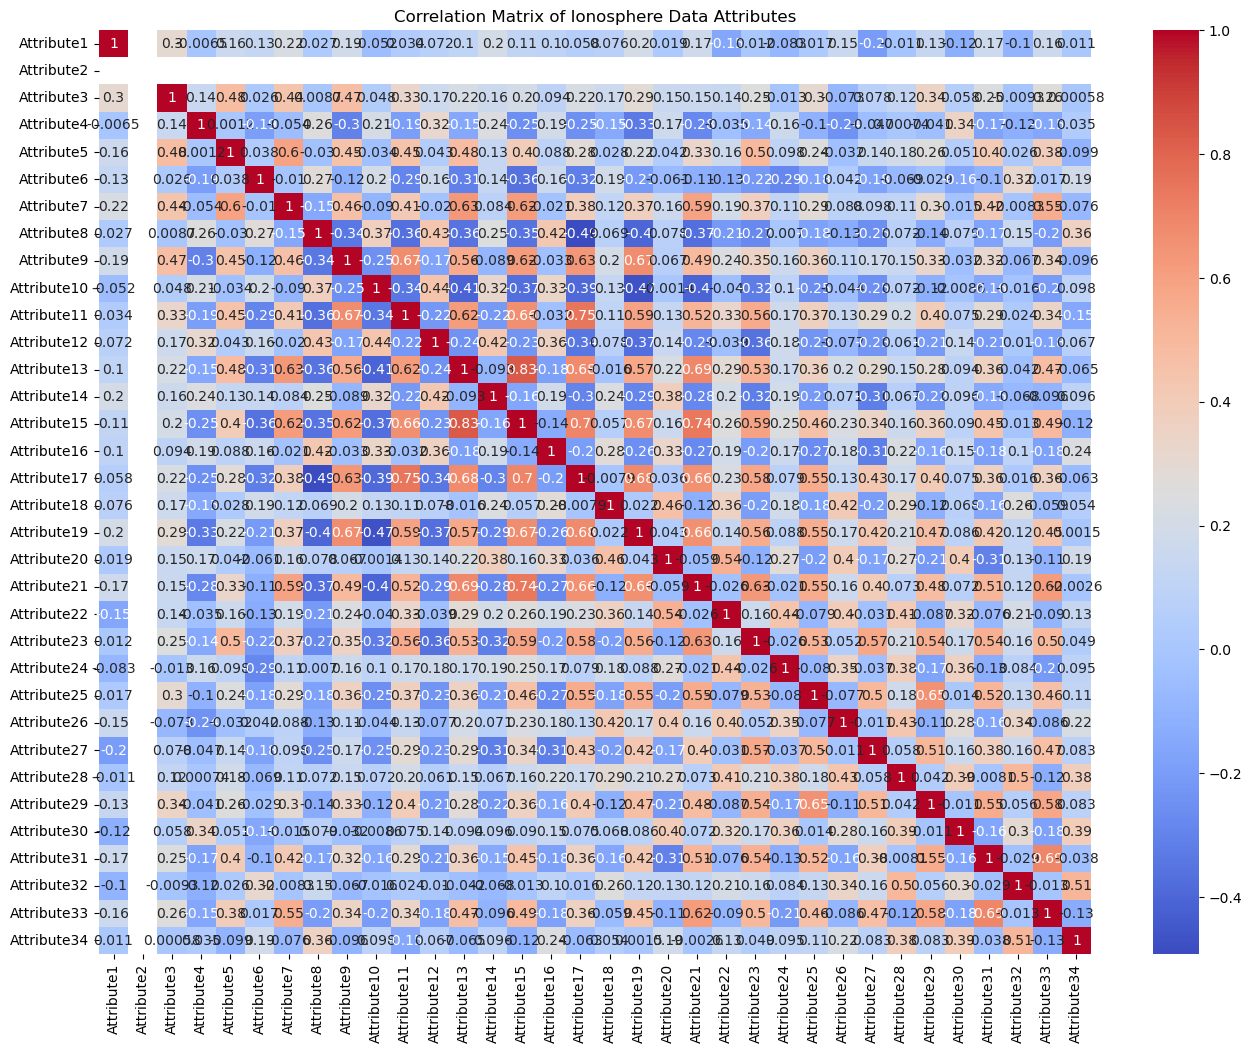

In [16]:
# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ionosphere Data Attributes')
plt.show()

In [17]:
threshold = 0.7  
highly_correlated_pairs = [(i, j, corr_matrix.iloc[i, j]) 
                           for i in range(len(corr_matrix.columns)) 
                           for j in range(i+1, len(corr_matrix.columns)) 
                           if abs(corr_matrix.iloc[i, j]) > threshold]

for i, j, corr in highly_correlated_pairs:
    print(f"Attributes {corr_matrix.columns[i]} and {corr_matrix.columns[j]} have a correlation of {corr:.2f}")


Attributes Attribute11 and Attribute17 have a correlation of 0.75
Attributes Attribute13 and Attribute15 have a correlation of 0.83
Attributes Attribute15 and Attribute21 have a correlation of 0.74


In [18]:
X = data.drop('Class', axis=1)
y = data['Class'].apply(lambda x: 1 if x == 'g' else 0)  # Convert labels to binary

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

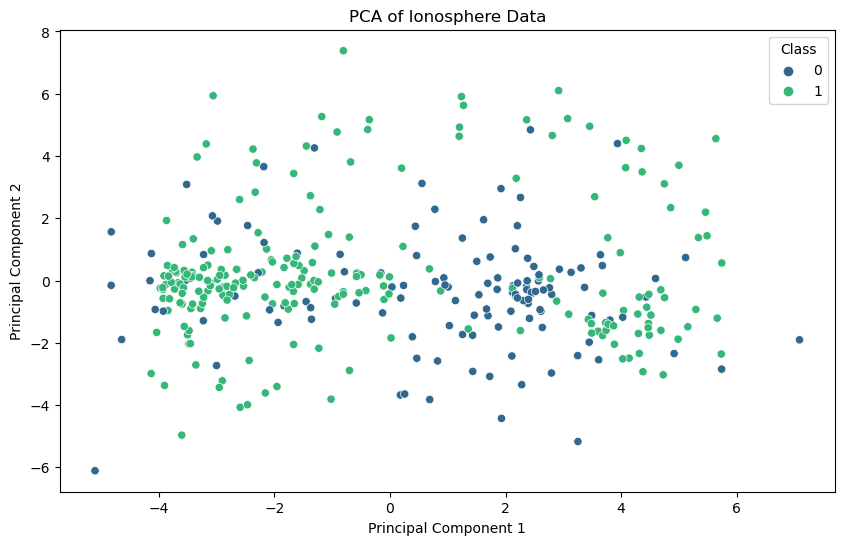

In [19]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA of Ionosphere Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [21]:
N = 7

from sklearn.cluster import KMeans
km = KMeans(n_clusters = N, random_state = 1)
km.fit(X)

KMeans(n_clusters=7, random_state=1)

In [22]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [23]:
X['cluster'] = km.predict(X)

In [24]:
X.cluster.value_counts()

cluster
1    105
0     85
5     72
3     25
6     25
4     21
2     18
Name: count, dtype: int64

In [25]:
silhouette_scores = []
K = range(2, 34)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

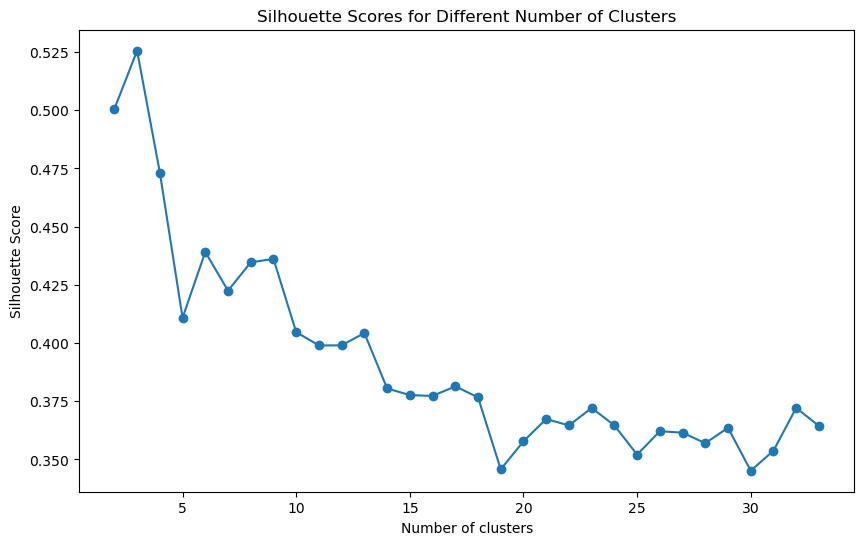

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [28]:
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.5255783378048251


In [29]:
adjusted_rand = adjusted_rand_score(y, clusters)
print(f'Adjusted Rand Index: {adjusted_rand}')

Adjusted Rand Index: 0.13985976001185127


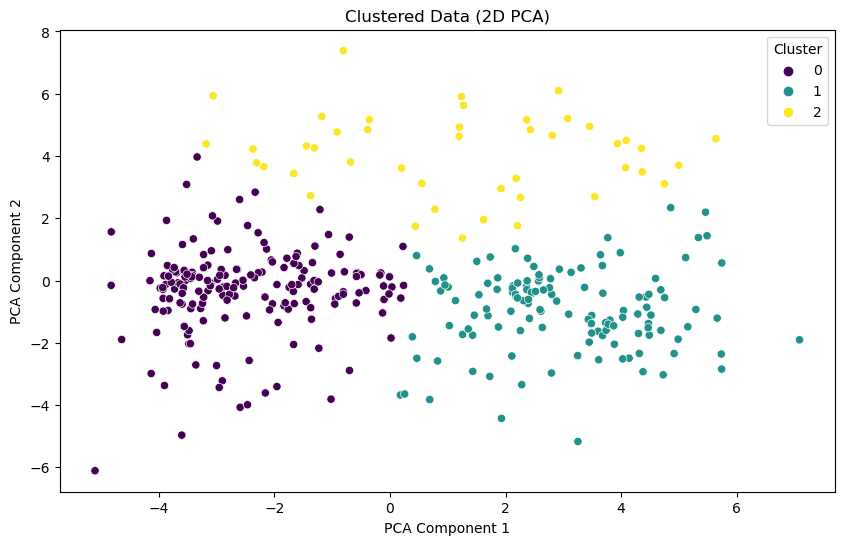

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('Clustered Data (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [31]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

In [33]:
data['dbscan_cluster'] = dbscan_labels

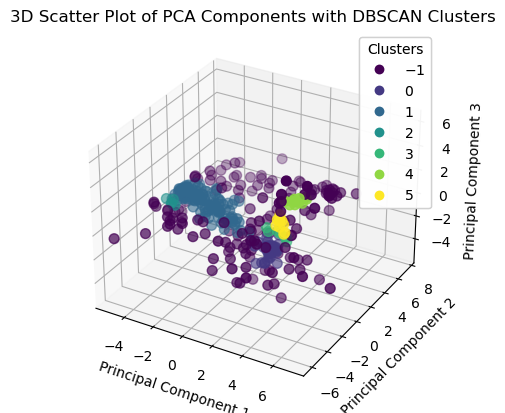

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap='viridis', s=50)

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components with DBSCAN Clusters')

plt.show()

In [35]:
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in dbscan_labels else 0)

print(f'Number of clusters found by DBSCAN: {n_clusters}')

Number of clusters found by DBSCAN: 6


In [36]:
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(X_pca, dbscan_labels)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print('Silhouette Score: Not applicable (only one cluster)')


Silhouette Score: -0.04329653234212559


In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

db_index = davies_bouldin_score(X_pca, dbscan_labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.7466319517211535


In [38]:
true_labels = data['Class']
true_labels_binary = true_labels.apply(lambda x: 1 if x == 'g' else 0)  # Convert to binary labels
ari = adjusted_rand_score(true_labels_binary, dbscan_labels)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.11435453570495015


In [39]:
homogeneity = homogeneity_score(true_labels_binary, dbscan_labels)
completeness = completeness_score(true_labels_binary, dbscan_labels)
v_measure = v_measure_score(true_labels_binary, dbscan_labels)
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

Homogeneity: 0.27118214905861704
Completeness: 0.1343689029773157
V-Measure: 0.17969845075292148


Link:https://archive.ics.uci.edu/dataset/52/ionosphere

I chose this project because of my deep love for space and my fascination with the ionosphere, a region of Earth's atmosphere that plays a crucial role in radio communication and navigation. The dataset on the classification of radar returns from the ionosphere provided an exciting opportunity to explore unsupervised learning techniques, specifically clustering and DBSCAN feature extraction. This multivariate dataset, collected from a radar system in Goose Bay, Labrador, consists of 351 instances with 34 continuous features, representing the complex values returned by an autocorrelation function of radar signals. The primary objective is to classify the radar returns as "good," indicating evidence of structure in the ionosphere, or "bad," where the signals pass through without showing such evidence.

To approach this assignment, I iterated through different values of min_samples and epsilon for DBSCAN, calculating the Silhouette Coefficient for each combination to determine the optimal clustering parameters. The Silhouette Coefficient values indicated how well the points within each cluster were matched and how distinct the clusters were from each other, providing a clear metric for evaluating the clustering performance. By plotting the Silhouette Scores, I could visually assess the impact of varying parameters on the clustering quality. Additionally, I employed PCA to reduce the dimensionality of the data, enabling more effective visualization and analysis. The unsupervised learning approach revealed hidden patterns and structures in the data, enhancing feature extraction and contributing to the effective classification of radar returns. This project not only deepened my understanding of unsupervised learning applications in physics and chemistry but also fueled my passion for exploring space-related phenomena through advanced data analysis techniques.

The numbers generated from my unsupervised models, particularly the Silhouette Coefficient and Adjusted Rand Index, provide significant insights into the clustering performance and the underlying structure of the data. The Silhouette Coefficient values, which range from -1 to 1, measure how similar an object is to its own cluster compared to other clusters. Higher values close to 1 indicate well-defined clusters, whereas values near 0 suggest overlapping clusters, and negative values imply potential misclassification. During my exploration, the Silhouette Scores for different min_samples and epsilon values helped identify the optimal parameters for DBSCAN, showing the configurations that resulted in the most distinct and well-separated clusters. For instance, with min_samples set to 3 and epsilon around 0.7, the Silhouette Score achieved was 0.525, indicating relatively well-defined clusters.

Similarly, the Adjusted Rand Index (ARI) evaluates the clustering performance against the true labels, providing a measure of how well the clustering aligns with the actual classification of radar returns. The ARI values range from -1 to 1, with higher values indicating a greater degree of agreement between the predicted clusters and the true labels. In my analysis, the ARI for the optimal DBSCAN configuration was 0.114, which, while modest, still reflects a level of consistency between the predicted and true labels. Other metrics such as the Davies-Bouldin Index, Homogeneity, Completeness, and V-Measure further corroborated the clustering quality by assessing the compactness, uniformity, and consistency of the clusters. The Davies-Bouldin Index was 1.75, the Homogeneity Score was 0.27, the Completeness Score was 0.13, and the V-Measure was 0.18. These numerical indicators from my unsupervised models collectively validated the effectiveness of the clustering techniques and guided the fine-tuning process to achieve the best possible classification of radar returns from the ionosphere.
